In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
from shapely.geometry import Point
import shutil

In [3]:
# Directory containing GeoPackage files for SADC countries
#sadc_directory = 'C:/Users/phall/OneDrive/Desktop/GeoPackage Files/'
sadc_directory = 'GeoPackage Files'
sadc_directory = os.path.join(os.getcwd(), sadc_directory)

# List to store GeoDataFrames for each country
sadc_geodataframes = []

# Iterate through all GeoPackage files in the directory
for filename in os.listdir(sadc_directory):
    if filename.endswith('.gpkg'):
        file_path = os.path.join(sadc_directory, filename)
        
        # Read the GeoPackage file into a GeoDataFrame
        country_gdf = gpd.read_file(file_path)
        
        # Append the GeoDataFrame to the list
        sadc_geodataframes.append(country_gdf)

# Concatenate all GeoDataFrames into a single GeoDataFrame
sadc_all_geodataframes = gpd.GeoDataFrame(pd.concat(sadc_geodataframes, ignore_index=True), geometry='geometry')

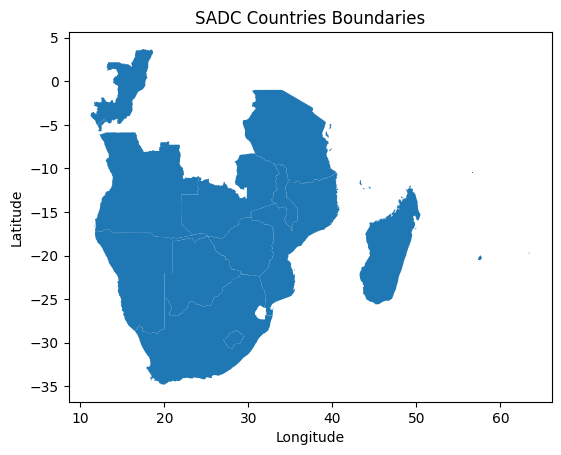

In [4]:
# Plot the geometries
sadc_all_geodataframes.plot()
plt.title("SADC Countries Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [19]:
# Directory containing the zip file
zip_file_path = 'C:/Users/phall/Downloads/Compressed/africa.zip'

#Destination directory for the data
output_directory = 'C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA'

In [22]:
# Path to the SADC GeoPackage directory
zip_file_path = 'C:/Users/phall/Downloads/Compressed/africa.zip'

# Open the zip file
with ZipFile(zip_file_path, 'r') as zip_file:
    # Iterate through the contents of the zip file
    for file_info in zip_file.infolist():
        try:
            # Check if the file is a CSV and its size is greater than 1kb because the 1kb files only include heading labels only and no data
            if file_info.filename.endswith('.csv') and file_info.file_size > 1024:
                # Extract the CSV content
                with zip_file.open(file_info.filename) as csv_file:
                    # Skip the header and read the 2nd line of the CSV because the datasets have one coordinate pair per file
                    header = csv_file.readline().decode('utf-8')
                    second_line = csv_file.readline().decode('utf-8').split('\n')[0]

                    # Using the coordinates from the 2nd line
                    if second_line and all(x.replace('.', '').isdigit() or x.replace('.', '').lstrip('-').isdigit() for x in second_line.replace('"', '').split(',')[1:3]):
                        # Remove double quotes and then convert to float
                        latitude, longitude = map(float, second_line.replace('"', '').split(',')[1:3])

                        # Create a Point geometry
                        point = Point(longitude, latitude)

                        # Check if the point is within the boundaries of each SADC country
                        for filename in os.listdir(sadc_directory):
                            if filename.endswith('.gpkg'):
                                sadc_gpkg_path = os.path.join(sadc_directory, filename)
                                sadc_boundaries = gpd.read_file(sadc_gpkg_path)

                                if sadc_boundaries.geometry.contains(point).any():
                                    print(f"Coordinates in {file_info.filename} are within {filename.replace('.gpkg', '')} boundaries")
                                    break  # No need to check in other SADC countries if already found
                        else:
                            print(f"Coordinates in {file_info.filename} are outside SADC countries boundaries")

                    else:
                        print(f"Skipping {file_info.filename} as the second line does not contain valid numeric data")

        except Exception as e:
            print(f"Error processing {file_info.filename}: {str(e)}")

Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108138.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108144.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108150.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108156.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108163.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108169.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108175.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108181.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108188.csv are outside SADC countries boundaries
Coordinates in 54946_2022-01-28-11-35-41/weatherdata--108194.csv are outs

In [38]:
# Path to the text file containing the output
output_text_path = 'C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/string_output.txt'
output_directory = 'C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data'

# Read the content of the text file
with open(output_text_path, 'r') as text_file:
    output_content = text_file.read()

# Extract filenames for those "within" SADC countries
within_files = [line.split('Coordinates in 54946_2022-01-28-11-35-41/')[1].split(' are within')[0] for line in output_content.split('\n') if 'are within' in line]

# Create the output folder if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Move files to the output folder
for filename in within_files:
    source_path = os.path.join('C:/Users/phall/Downloads/Compressed/africa/54946_2022-01-28-11-35-41', filename)
    destination_path = os.path.join(output_directory, filename)
    
    try:
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
            print(f"Successfully moved {filename} to {output_directory}")
        else:
            print(f"Source file {filename} not found at {source_path}")
    except Exception as e:
        print(f"Error moving {filename}: {str(e)}")

Successfully moved weatherdata-123-150.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-156.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-163.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-25.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-31.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-38.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-44.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-50.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully moved weatherdata-123-56.csv to C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data
Successfully mov

In [92]:
# Path to the directory containing your CSV files
directory_path = r'C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA'

# List all CSV files in the directory
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

dfs = [pd.read_csv(file) for file in file_paths]

consolidated_data = pd.concat(dfs)

consolidated_data = consolidated_data.shift(1, axis=1)

consolidated_data['Date'] = consolidated_data.index

consolidated_data = consolidated_data.reset_index()
consolidated_data = consolidated_data.drop(['index'], axis=1)

consolidated_data.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,-15.0,12.333,54,34.362,19.125,0.0,2.821236,0.202806,19.743755
1,1/2/1979,-15.0,12.333,54,33.579,19.038,0.0,2.674656,0.160042,19.864798
2,1/3/1979,-15.0,12.333,54,34.069,18.327,0.0,2.051383,0.187877,18.966041
3,1/4/1979,-15.0,12.333,54,37.393,15.531,0.0,1.565367,0.208814,19.872168
4,1/5/1979,-15.0,12.333,54,35.706,14.975,0.0,1.857272,0.365714,19.756289


In [94]:
consolidated_data.shape

(2168662, 10)

In [95]:
consolidated_data.to_csv('C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Filtered Data/Weather Data.csv')